In [ ]:
# Install kaggle package for python
!pip install kaggle

In [ ]:
import os

os.environ['KAGGLE_CONFIG_DIR'] = 'C:/Users/kumar/Downloads'

In [ ]:
# Download dataset to local machine using kaggle API
!kaggle datasets download -d aarushi1712/breast-cancer-dataset

In [ ]:
import pandas as pd
# Load the dataset from the machine using raw string to avoid backslash acting as an escape character
dataset_path = r'C:\Users\kumar\breast-cancer-dataset\data.csv' 
df = pd.read_csv(dataset_path)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [ ]:
# Display top 5 rows to check if dataset is read successfully
df.head()

In [ ]:
# Count of no. of rows and columns of dataset
df.shape

In [ ]:
# Summary of dataframe
df.info()

In [ ]:
# Names of columns in dataset
df.columns

In [ ]:
# Check for null values
df.isnull().sum()

In [ ]:
# Dropping column with null values
df.drop("Unnamed: 32", axis=1, inplace=True)

In [ ]:
# Dropping id column to make dataset more clean and useful
df.drop('id',axis=1, inplace=True)

In [ ]:
# Summary of statistical measure to understand data
df.describe()

In [ ]:
# Visualizing data using Seaborn Library to count no. of M and B cases
plt.figure(figsize = (5,3))
sns.countplot(x="diagnosis", data=df, palette='magma')

In [ ]:
# Mean, standard error and worst(mean of 3 largest values) are used in dataset
df.columns

In [ ]:
# Dividing columns with diagnosis
# Mean
m_col = ['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
# SE
s_col = ['diagnosis','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']
# Worst
w_col = ['diagnosis','radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [ ]:
# Visualizing pair wise relationship between each variable with other for mean columns
# Color based on diagnosis column
sns.pairplot(df[m_col],hue = 'diagnosis', palette='Blues')

In [ ]:
# Visualizing pair wise relationship between each variable with other for SE columns
sns.pairplot(df[s_col],hue = 'diagnosis', palette='Greens')

In [ ]:
# Count of M and B rows in dataset
df['diagnosis'].value_counts()

In [ ]:
# Mapping categorical to numerical values
df['diagnosis']=df['diagnosis'].map({'B':0,'M':1})

In [ ]:
# Count of M and B rows in dataset with numerical values
df['diagnosis'].value_counts()

In [ ]:
# Visualize correlation matrix
plt.figure(figsize=(18,16))
sns.heatmap(df.corr(), annot=True,linewidths=.5, cmap="Purples")

In [ ]:
from sklearn.model_selection import train_test_split

# splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(
                df.drop('diagnosis', axis=1),
                df['diagnosis'],
                test_size=0.2,
                random_state=42)

print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [ ]:
# using logistic reasoning
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predictions1 = logreg.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix: \n", confusion_matrix(y_test, predictions1))
print('\n')
print(classification_report(y_test, predictions1))

In [ ]:
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(y_test, predictions1)
print("Accuracy of the Logistic Regression Model is: ", logreg_acc)

In [29]:
# using K Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

In [30]:
# to find which value shows the lowest mean error
error_rate = []

for i in range(1,42):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


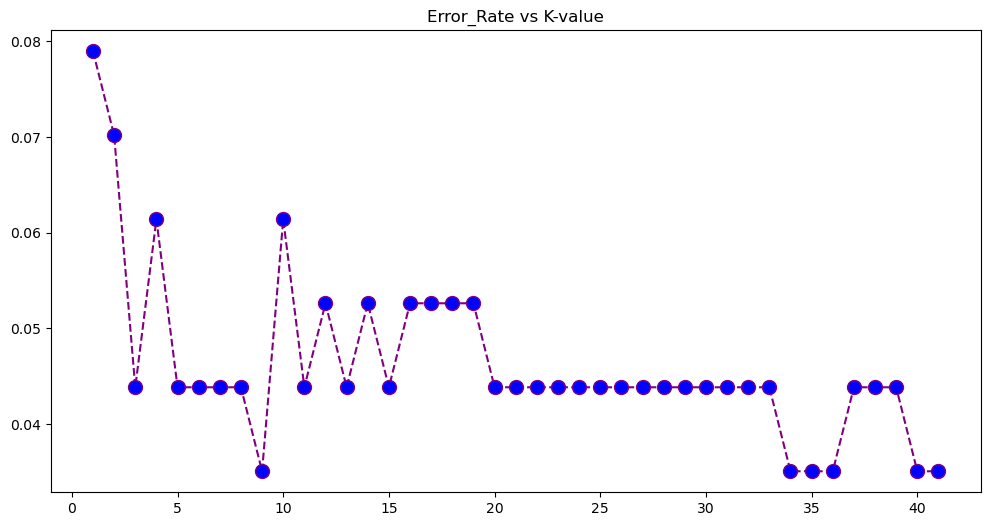

In [31]:
plt.figure(figsize=(12,6))
plt.plot(range(1,42), error_rate, color='purple', linestyle="--",
         marker='o', markersize=10, markerfacecolor='b')
plt.title('Error_Rate vs K-value')
plt.show()

In [32]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
predictions2 = knn.predict(X_test)

In [33]:
print(confusion_matrix(y_test, predictions2))
print("\n")
print(classification_report(y_test, predictions2))

[[69  2]
 [ 2 41]]


              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [34]:
knn_model_acc = accuracy_score(y_test, predictions2)
print("Accuracy of K Neighbors Classifier Model is: ", knn_model_acc)

Accuracy of K Neighbors Classifier Model is:  0.9649122807017544


In [35]:
# using Random Forests
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train, y_train)
predictions4 = rfc.predict(X_test)


In [36]:
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions4))
print("\n")
print(classification_report(y_test, predictions4))

Confusion Matrix: 
 [[70  1]
 [ 3 40]]


              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [37]:
rfc_acc = accuracy_score(y_test, predictions4)
print("Accuracy of Random Forests Model is: ", rfc_acc)

Accuracy of Random Forests Model is:  0.9649122807017544


In [38]:
# comparing accuracies
print(logreg_acc)
print(knn_model_acc)
print(rfc_acc)

0.9824561403508771
0.9649122807017544
0.9649122807017544


<Axes: >

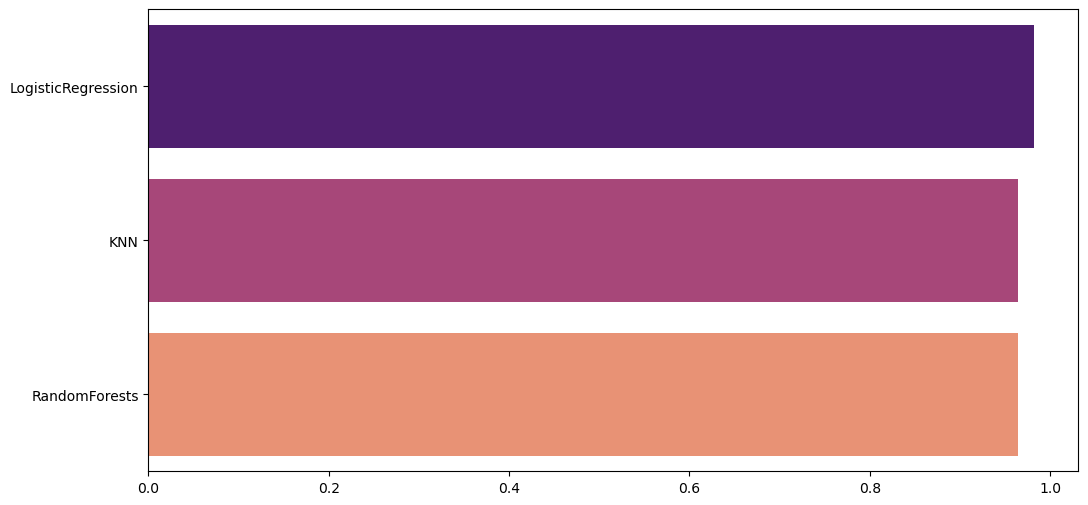

In [39]:
# visualizing accuracies
plt.figure(figsize=(12,6))
model_acc = [logreg_acc, knn_model_acc, rfc_acc]
model_name = ['LogisticRegression', 'KNN', 'RandomForests']
sns.barplot(x= model_acc, y=model_name, palette='magma')